In [2]:
#Importing Libaries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#Filter for Data Analyst
df_DA = df[df["job_title_short"] == "Data Analyst"].copy()

# Import from 12_Exer...

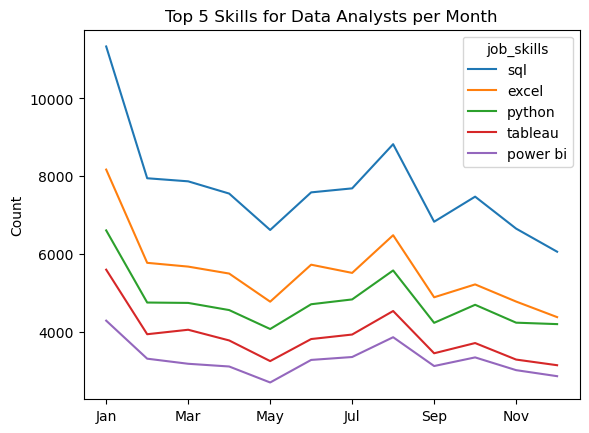

In [4]:
#create a new column for month number
df_DA["job_posted_month_no"] = df_DA["job_posted_date"].dt.month

#Explode the job_skills column and pivot
df_DA_explode = df_DA.explode("job_skills")
df_DA_pivot = df_DA_explode.pivot_table(index="job_posted_month_no", columns="job_skills", aggfunc="size", fill_value=0)

#sort the skills by count
df_DA_pivot.loc["Total"] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc["Total"].sort_values(ascending = False).index]
df_DA_pivot  = df_DA_pivot.drop("Total")

#use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot["job_posted_month"] = df_DA_pivot["job_posted_month_no"].apply(lambda x: pd.to_datetime(x, format="%m").strftime("%b"))
df_DA_pivot = df_DA_pivot.set_index("job_posted_month")
df_DA_pivot = df_DA_pivot.drop(columns="job_posted_month_no")


df_DA_pivot.iloc[:, :5].plot(kind="line")
plt.title("Top 5 Skills for Data Analysts per Month")
plt.xlabel("")
plt.ylabel("Count")
plt.show()

# Actual start from 16_Math...

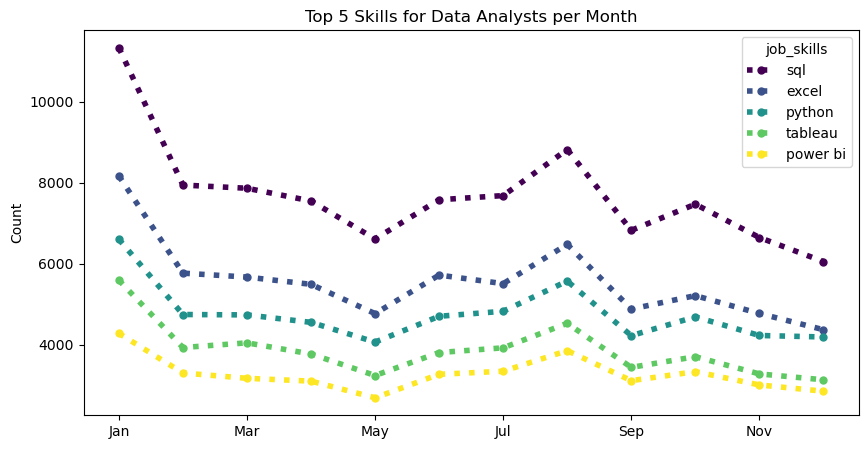

In [30]:
df_DA_pivot.iloc[:,:5].plot(
    kind="line",
    linewidth=4,
    linestyle=":", #options "-", "--", "-.", ":"
    colormap="viridis",
    marker="o", #options: "o", "x", "+", "*", "s", ",", ".", "1", "2", "3", "4", ...
    markersize= 5,
    figsize=(10,5),
)

plt.title("Top 5 Skills for Data Analysts per Month")
plt.xlabel("")
plt.ylabel("Count")
plt.show()

# Coustomising Scatterplot from 15_Scatter.. 

In [37]:
# explodes the "job Skills" intoi individual rows
df_exploded = df.explode("job_skills")

# calculates the avg salary and count of job postings per skill
skill_stats = df_exploded.groupby("job_skills").agg(
    median_salary=("salary_year_avg", "median"),
     skill_count=("job_skills", "count")
)

#limit to the top skills
skill_count= 20
skills_stats = skill_stats.sort_values(by= "skill_count", ascending=False).head(skill_count)

skills_stats

,median_salary,skill_count
job_skills,,
sql,120000.0,384849
python,125000.0,380909
aws,135000.0,145381
azure,125000.0,132527
r,119550.0,130892
tableau,111175.0,127213
excel,92500.0,127018
spark,140000.0,114609
power bi,102000.0,98147


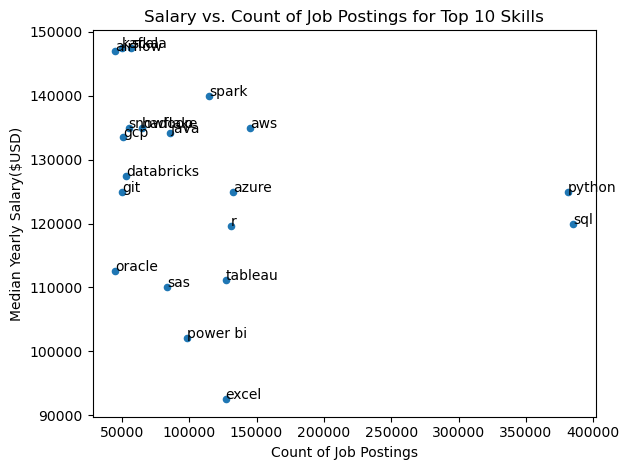

In [38]:
skills_stats.plot(kind="scatter", x="skill_count", y="median_salary")

for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats["skill_count"].iloc[i], skills_stats["median_salary"].iloc[i], txt)


plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Salary($USD)")
plt.title("Salary vs. Count of Job Postings for Top 10 Skills")
plt.tight_layout()
plt.show()

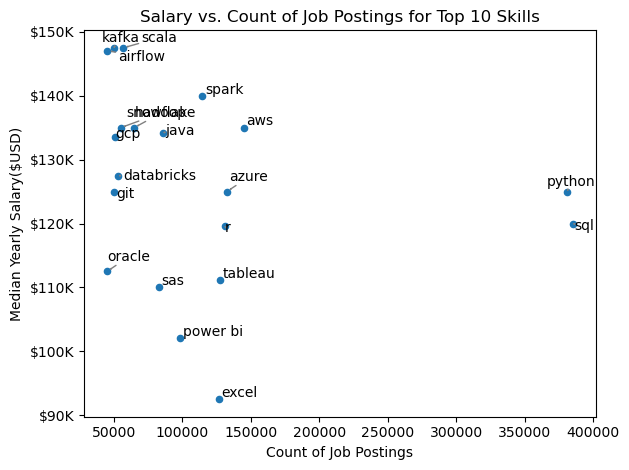

In [52]:
#fig, ax = plt.subplots()


from adjustText import adjust_text

skills_stats.plot(kind="scatter", x="skill_count", y="median_salary")

texts = []
for i, txt in enumerate(skills_stats.index):
    texts.append(plt.text(skills_stats["skill_count"].iloc[i], skills_stats["median_salary"].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle="->", color="grey", lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))

plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Salary($USD)")
plt.title("Salary vs. Count of Job Postings for Top 10 Skills")
plt.tight_layout()
plt.show()